### Project Overview
- For this project yoiu will use Boston's house prieces data set fro nSklearn to predict the home prices using an Artificial  Neural Network. The daa set has alredyt been structured to allow you work efficiently. You are responsible for running a few visualization prior to creating your model and reparing the data.

In [1]:
pwd

'/Users/admin/Desktop/python/Portfolio/Artificial Neural Networks/Boston Home Prices'

## Project Approach
- Gather the data from Sklearn and assigne the appropriate columns as well as target
- use sklearn in conjunctiin with matplotlib to create visualizations of basic analysis
- Use Tansorflowkeras/tensorboard to create a Regression model of the data to predict the prices of the houses
- Test the model on random data to see the accuracy of the model
- adjustm odel if need be
- Save the model

In [1]:
from sklearn.datasets import load_boston

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
import pandas as pd

In [8]:
data = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)

In [10]:
data["target"] = load_boston().target

## Summary 
- There are 506 data points in the data set 
- There are no data points missing so we can begin our analysis

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Correlation Anaysis
- We will see which feature correlates mostly to the target "Price"
- Appears that number of rooms effects the price of the home mostly

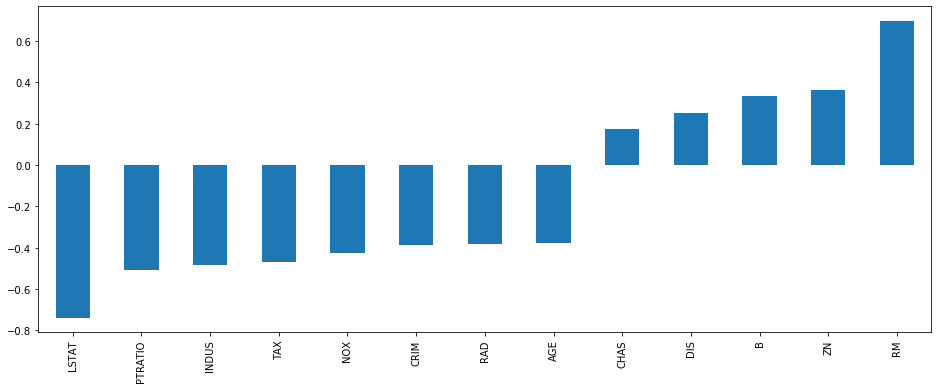

In [25]:
data.corr()["target"].sort_values()[:-1].plot(kind = "bar", figsize = (16,6))

### Rooms and Price
- The data set contains homes with mosely 6 bed rooms

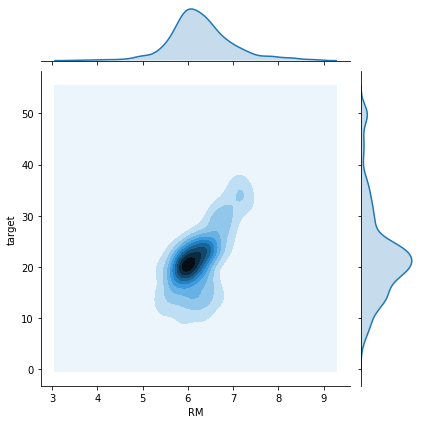

In [36]:
sns.jointplot(x = "RM", y = "target", data=data, kind = "kde")

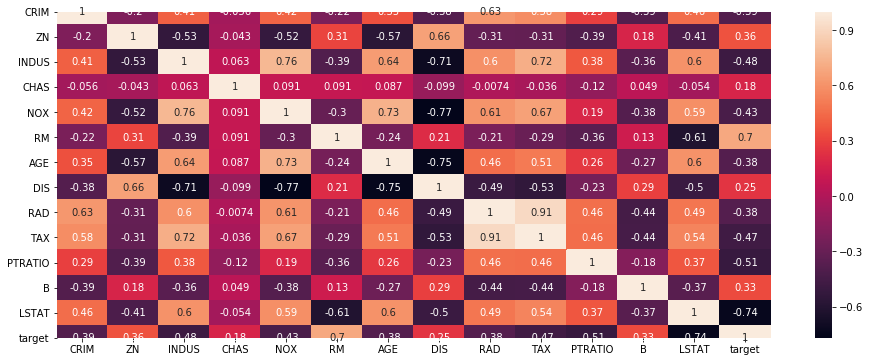

In [42]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), annot= True, cbar=True)

### Preparing The Data
- We will list our feeatures as out X labels
- The Y label will represent the Target - "Price" of a home in boston

In [154]:
X = data.drop("target", axis=1).values
y = data["target"].values

### Training Testing and Splitting the data 
- Will need to seperate the data into a training and testing group 
- Since this data set is not too large we will train on 30% of the data

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Scaling the Data 
- we will need to Scale the data to take into account all outliers 
- alos allows our model to understand the range and behavior of our data set

In [157]:
from sklearn.preprocessing import MinMaxScaler

In [158]:
scalar = MinMaxScaler()

In [159]:
X_train = scalar.fit_transform(X_train)

In [160]:
X_test = scalar.transform(X_test)

### Callbacks
- Will add Early Stopping to the Model to prevent overtraining and attempt to get the best training val possible relative to the validation data
- We will also create the TensrBoard model here

In [161]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [162]:
stop = EarlyStopping(monitor="val_loss", mode = "min", verbose=2, patience=20)

In [163]:
log_dir = "resources/logs/fit"
board = TensorBoard(    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None,)

### Creating  Model 

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [165]:
model = Sequential()
model.add(Dense(units= 30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 20, activation = "relu"))
model.add(Dense(units= 20, activation = "relu"))
model.add(Dense(units= 10, activation = "relu"))
model.add(Dense(units= 1))
model.compile(loss = "mse", optimizer = "adam")

### Fitting the model
- We will add stopping the the model, and validation data to check the accuracy during training

In [166]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=500, callbacks=[stop, board])

Train on 354 samples, validate on 152 samples
Epoch 1/500
354/354 [==============================] - 1s 4ms/sample - loss: 615.0108 - val_loss: 521.9999
Epoch 2/500
354/354 [==============================] - 0s 493us/sample - loss: 602.1755 - val_loss: 506.3951
Epoch 3/500
354/354 [==============================] - 0s 461us/sample - loss: 581.5577 - val_loss: 483.7823
Epoch 4/500
354/354 [==============================] - 0s 476us/sample - loss: 550.3187 - val_loss: 449.0144
Epoch 5/500
354/354 [==============================] - 0s 466us/sample - loss: 504.7760 - val_loss: 394.5281
Epoch 6/500
354/354 [==============================] - 0s 457us/sample - loss: 436.3928 - val_loss: 312.9611
Epoch 7/500
354/354 [==============================] - 0s 447us/sample - loss: 337.7227 - val_loss: 211.1189
Epoch 8/500
354/354 [==============================] - 0s 451us/sample - loss: 226.7288 - val_loss: 138.1129
Epoch 9/500
354/354 [==============================] - 0s 447us/sample - loss: 178.0

354/354 [==============================] - 0s 421us/sample - loss: 24.4222 - val_loss: 14.7683
Epoch 152/500
354/354 [==============================] - 0s 436us/sample - loss: 23.8924 - val_loss: 16.9632
Epoch 153/500
354/354 [==============================] - 0s 419us/sample - loss: 21.0628 - val_loss: 16.6259
Epoch 154/500
354/354 [==============================] - 0s 418us/sample - loss: 22.1133 - val_loss: 16.4245
Epoch 155/500
354/354 [==============================] - 0s 416us/sample - loss: 26.4048 - val_loss: 15.3121
Epoch 156/500
354/354 [==============================] - 0s 425us/sample - loss: 22.3847 - val_loss: 15.9754
Epoch 157/500
354/354 [==============================] - 0s 432us/sample - loss: 23.8855 - val_loss: 16.0400
Epoch 158/500
354/354 [==============================] - 0s 426us/sample - loss: 25.2079 - val_loss: 15.2124
Epoch 159/500
354/354 [==============================] - 0s 419us/sample - loss: 26.9900 - val_loss: 16.8022
Epoch 00159: early stopping


### Checking Model Performance
- Model ttrained very well and looks to still have room for training

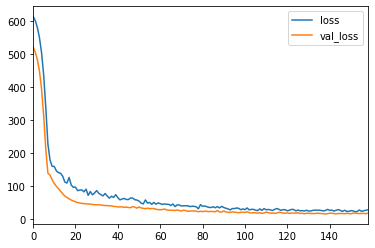

In [167]:
pd.DataFrame(model.history.history).plot()

### Predictions 

In [168]:
predictions = model.predict(X_test)

### Checking metrics for predictions

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [170]:
mean_absolute_error(y_test,predictions)

2.5772648924275448

In [171]:
mean_squared_error(y_test,predictions)

16.802195257928332

### Model tells us the 82% of the prices is explained by the features in the data set

In [172]:
explained_variance_score(y_test,predictions)

0.7899977362337319

## Testing Model on random Data
- We will pass the model random features and test its predicitons of the house price

In [173]:
from random import randint
rand_index = randint(1, len(data))
random_home = data.drop("target", axis = 1).iloc[rand_index]

### New Home 
- Because the home selected is missing the target feature(Price) we can use the features alone to predict the price. 
- Wll need to keep in mind that the data was scaled so will need to scale the new home feature values 
- as well as reshape to fit what our model is looking for

In [174]:
X_train.shape

(354, 13)

In [175]:
random_home.shape

(13,)

In [176]:
new_home = scalar.transform(random_home.values.reshape(1,13))

In [177]:
new_home.shape

(1, 13)

### Price Prediction for new home
- Price prediciton for the new home 
- Appears our model predictied pretty well on the price of the new home

In [178]:
model.predict(new_home)

array([[18.104515]], dtype=float32)

## True Value for new home 
- Since we know that value of the new home at the random index we can look at out original data to get the true price

In [179]:
data.iloc[rand_index]["target"]

16.6